<a href="https://colab.research.google.com/github/ipeirotis/dealing_with_data/blob/master/08-Visualization/F-Visualization_of_Population_Data_with_Choropleths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Population and Unemployment Data

In [1]:
#Colab requires specific installation of cartopy
#!sudo apt-get -qq install python-cartopy python3-cartopy;
!sudo pip3 uninstall -y shapely;    # cartopy and shapely aren't friends (early 2020)
!sudo pip3 install shapely --no-binary shapely;

Uninstalling Shapely-1.7.0:
  Successfully uninstalled Shapely-1.7.0
     |████████████████████████████████| 358kB 3.4MB/s 
Skipping wheel build for shapely, due to binaries being disabled for it.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
    Running setup.py install for shapely ... done


In [2]:
!sudo pip3 install --upgrade -qq cython numpy pyshp six

     |████████████████████████████████| 20.2MB 54.0MB/s 
     |████████████████████████████████| 225kB 40.1MB/s 
ERROR: google-colab 1.0.0 has requirement six~=1.12.0, but you'll have six 1.14.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [3]:
!sudo apt-get install -y libgeos-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 25 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 0s (149 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libgeos-dev.
(Readin

In [6]:
!sudo apt-get update

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [844 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Get:11 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 Packages [52.4 kB]
Get:12 http://security.ubuntu.com/ubuntu bionic-sec

In [7]:
!sudo apt-get install -y -qq libproj-dev proj-data proj-bin libgdal-dev libspatialindex-dev 

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 43.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
(Reading database ... 144584 files and directories currently installed.)
Preparing to unpack .../00-libsqlite3-0_3.22.0-1ubuntu0.3_amd64.deb ...
Unpacking libsqlite3-0:amd64 (3.22.0-1ubuntu0.3) over (3.22.0-1ubuntu0.1) ...
Preparing to unpack .../01-libmysqlclient20_5.7.30-0ubuntu0.18.04.1_amd64.deb ...
Unpacking libmysqlclient20:amd64 (5.7.30-0ubuntu0.18.04.1) over (5.7.29-0ubuntu0.18.04.1) ...
Selecting previously unselected package libmysqlclient-dev.
Preparing to unpack .../02-libmysqlclient-dev_5.7.30-0ubuntu0.18.04.1_amd64.deb ...
Unpacki

In [8]:
!sudo pip3 install -U cartopy

     |████████████████████████████████| 14.4MB 329kB/s 
  Created wheel for cartopy: filename=Cartopy-0.18.0-cp36-cp36m-linux_x86_64.whl size=15132423 sha256=f9d577251d5083a0565e272bbd7e72298f127761679a9db889af8378d259e0af
  Stored in directory: /root/.cache/pip/wheels/8d/f8/da/2c05136f2162370d2baec85bfbbf91d7729ab9e248da878acd
Successfully built cartopy


In [0]:
# !sudo apt-get install -y libspatialindex-dev

In [0]:
!sudo pip3 install -U -qq geopandas fiona pyproj descartes pysal rtree scipy pykdtree pyepsg pillow matplotlib OWSLib geoplot

In [0]:
# !sudo -H pip3 install -U pip cython cartopy geoplot descartes pysal geopandas pandas numpy requests

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import requests # to connect to the Census API

import pandas as pd
import numpy as np

import geopandas as gpd
import geoplot
import geoplot.crs as gcrs

In [0]:
# To plot the choropleths, we need the shapefiles for the areas. Below we use 
# shapefiles that come from the US Census data
# 
# More files at https://www.census.gov/geo/maps-data/data/tiger-cart-boundary.html
# 
# Check also http://geojson.xyz/ for more shapefiles
#
shapefiles_zipcodes = "http://www2.census.gov/geo/tiger/GENZ2017/shp/cb_2017_us_zcta510_500k.zip"
shapefiles_counties = "http://www2.census.gov/geo/tiger/GENZ2017/shp/cb_2017_us_county_500k.zip"
shapefiles_states   = "http://www2.census.gov/geo/tiger/GENZ2017/shp/cb_2017_us_state_500k.zip"

## Load GeoDataframe for US States and plot a map

In [0]:
df_states = gpd.read_file(shapefiles_states)

In [0]:
# df_states

In [0]:
# Dropping non-continental states
df_states = df_states[ df_states.NAME!='Alaska' ] 
df_states = df_states[ df_states.NAME!='Hawaii' ] 
df_states = df_states[ df_states.NAME!='Puerto Rico' ] 
df_states = df_states[ df_states.NAME!='Guam' ] 
df_states = df_states[ df_states.NAME!='Commonwealth of the Northern Mariana Islands' ] 
df_states = df_states[ df_states.NAME!='American Samoa' ] 
df_states = df_states[ df_states.NAME!='United States Virgin Islands' ] 

In [0]:
# Should be 49. The 48 continental, plus DC
assert( len(df_states) == 49 )

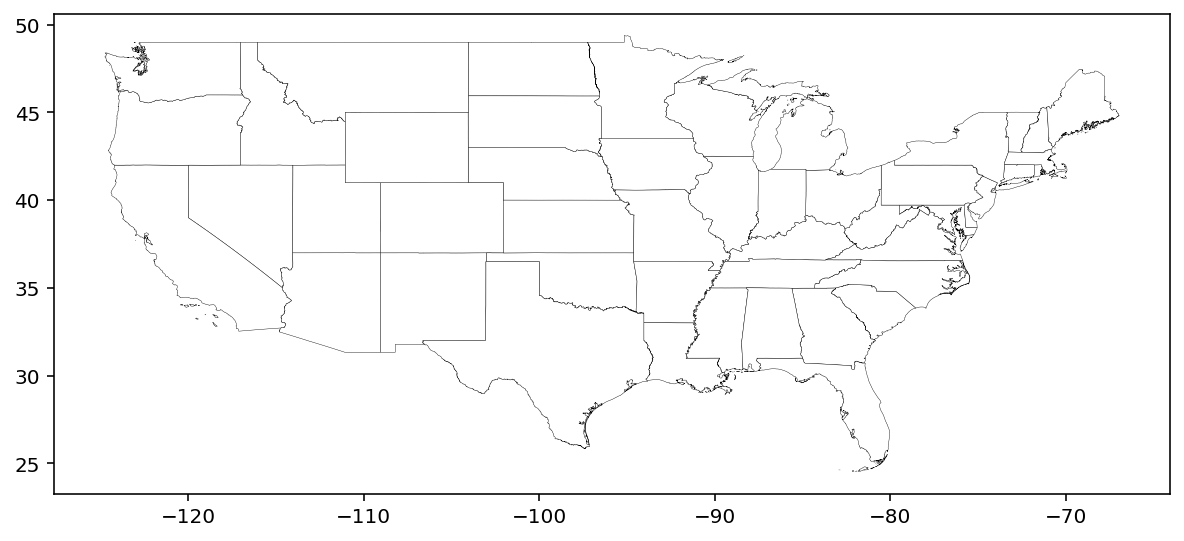

In [24]:
df_states.plot(
    figsize=(10,10), 
    linewidth=0.2, 
    color='white', 
    edgecolor='black'
)

## Load US Counties Datafame and plot a map

In [0]:
df_counties = gpd.read_file(shapefiles_counties)

In [0]:
# df_counties

In [27]:
len(df_counties)

3233

In [0]:
# There should be 3233 counties looaded
assert( len(df_counties) == 3233 )

In [0]:
# Keep only counties in the lower 48 states + DC
keep_county = df_counties.STATEFP.isin(df_states.STATEFP.values)
df_counties = df_counties[ keep_county ]

In [0]:
# There should be 3108 counties remaining
assert(len(df_counties) == 3108)

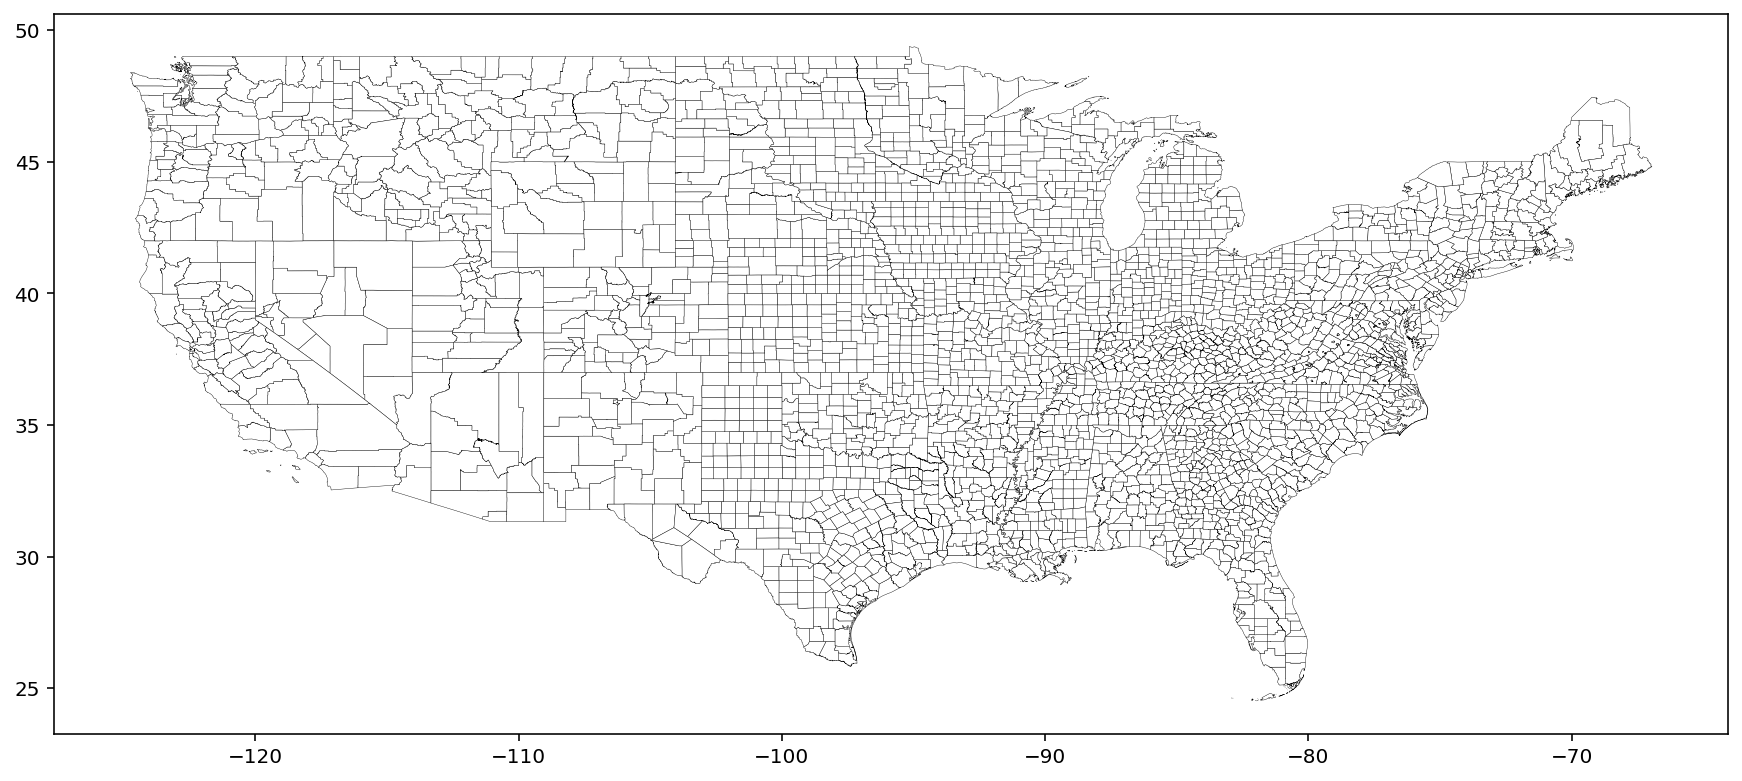

In [31]:
df_counties.plot(
    figsize=(15,15), 
    linewidth=0.2,  
    color='white', 
    edgecolor='black'
)

## Getting Census Data

You need to get an API Key from http://api.census.gov/data/key_signup.html.

In [0]:
# https://www.census.gov/data/developers/data-sets.html

# Querying the "Decentennial" (dec) censur of 2010
# https://www.census.gov/data/developers/data-sets/decennial-census.html

class Census:
    def __init__(self, key):
        self.key = key

    def get(self, fields, geo, dataset='sf1'):
        fields = [','.join(fields)]
        base_url = f'https://api.census.gov/data/2010/dec/{dataset}?key={self.key}&get='
        query = fields
        for item in geo:
            query.append(item)
        add_url = '&'.join(query)
        url = base_url + add_url
        response = requests.get(url)
        return response.json()
        # return ast.literal_eval(response.text) 

api_key = '627d4107b57d4576f2120d2b87b59c7440e5d2af'
census = Census(api_key)

## Plot a Choropleth with Population of US States

In [33]:
# We are querying for "Population" (variable P001001)
# See https://api.census.gov/data/2010/dec/sf1/variables.html for other variables

# Fetch state population data from US Census
census_response = census.get(['P001001'], ['for=state:*'])
census_response

[['P001001', 'state'],
 ['4779736', '01'],
 ['710231', '02'],
 ['6392017', '04'],
 ['2915918', '05'],
 ['37253956', '06'],
 ['4533372', '22'],
 ['4339367', '21'],
 ['5029196', '08'],
 ['3574097', '09'],
 ['897934', '10'],
 ['601723', '11'],
 ['18801310', '12'],
 ['9687653', '13'],
 ['1360301', '15'],
 ['1567582', '16'],
 ['12830632', '17'],
 ['6483802', '18'],
 ['3046355', '19'],
 ['2853118', '20'],
 ['1328361', '23'],
 ['5773552', '24'],
 ['6547629', '25'],
 ['9883640', '26'],
 ['5303925', '27'],
 ['2967297', '28'],
 ['5988927', '29'],
 ['989415', '30'],
 ['1826341', '31'],
 ['2700551', '32'],
 ['1316470', '33'],
 ['8791894', '34'],
 ['2059179', '35'],
 ['19378102', '36'],
 ['9535483', '37'],
 ['672591', '38'],
 ['11536504', '39'],
 ['3751351', '40'],
 ['3831074', '41'],
 ['12702379', '42'],
 ['1052567', '44'],
 ['4625364', '45'],
 ['814180', '46'],
 ['6346105', '47'],
 ['25145561', '48'],
 ['2763885', '49'],
 ['625741', '50'],
 ['8001024', '51'],
 ['6724540', '53'],
 ['1852994', '54'

In [34]:
# Manipulate the result from the US Census API and convert the result to a dataframe
df_state_population = pd.DataFrame(census_response[1:], columns = ['Population', 'STATEFP'])
df_state_population['Population'] = pd.to_numeric(df_state_population['Population'])
df_state_population['LogPopulation'] = np.log10(df_state_population['Population'])
df_state_population

Population STATEFP  LogPopulation
0      4779736      01       6.679404
1       710231      02       5.851400
2      6392017      04       6.805638
3      2915918      05       6.464775
4     37253956      06       7.571172
5      4533372      22       6.656421
6      4339367      21       6.637426
7      5029196      08       6.701499
8      3574097      09       6.553166
9       897934      10       5.953244
10      601723      11       5.779397
11    18801310      12       7.274188
12     9687653      13       6.986219
13     1360301      15       6.133635
14     1567582      16       6.195230
15    12830632      17       7.108248
16     6483802      18       6.811830
17     3046355      19       6.483781
18     2853118      20       6.455320
19     1328361      23       6.123316
20     5773552      24       6.761443
21     6547629      25       6.816084
22     9883640      26       6.994917
23     5303925      27       6.724597
24     2967297      28       6.472361
25     5988927      29       6.777349
26      989415      30       5.995378
27     1826341      31       6.261582
28     2700551      32       6.431452
29     1316470      33       6.119411
30     8791894      34       6.944082
31     2059179      35       6.313694
32    19378102      36       7.287311
33     9535483      37       6.979343
34      672591      38       5.827751
35    11536504      39       7.062074
36     3751351      40       6.574188
37     3831074      41       6.583321
38    12702379      42       7.103885
39     1052567      44       6.022250
40     4625364      45       6.665146
41      814180      46       5.910720
42     6346105      47       6.802507
43    25145561      48       7.400461
44     2763885      49       6.441520
45      625741      50       5.796395
46     8001024      51       6.903146
47     6724540      53       6.827663
48     1852994      54       6.267874
49     5686986      55       6.754882
50      563626      56       5.750991
51     3725789      72       6.571218

In [0]:
# ax = df_state_population.LogPopulation.hist()
# df_state_population.LogPopulation.plot.kde(secondary_y=True, ax = ax)

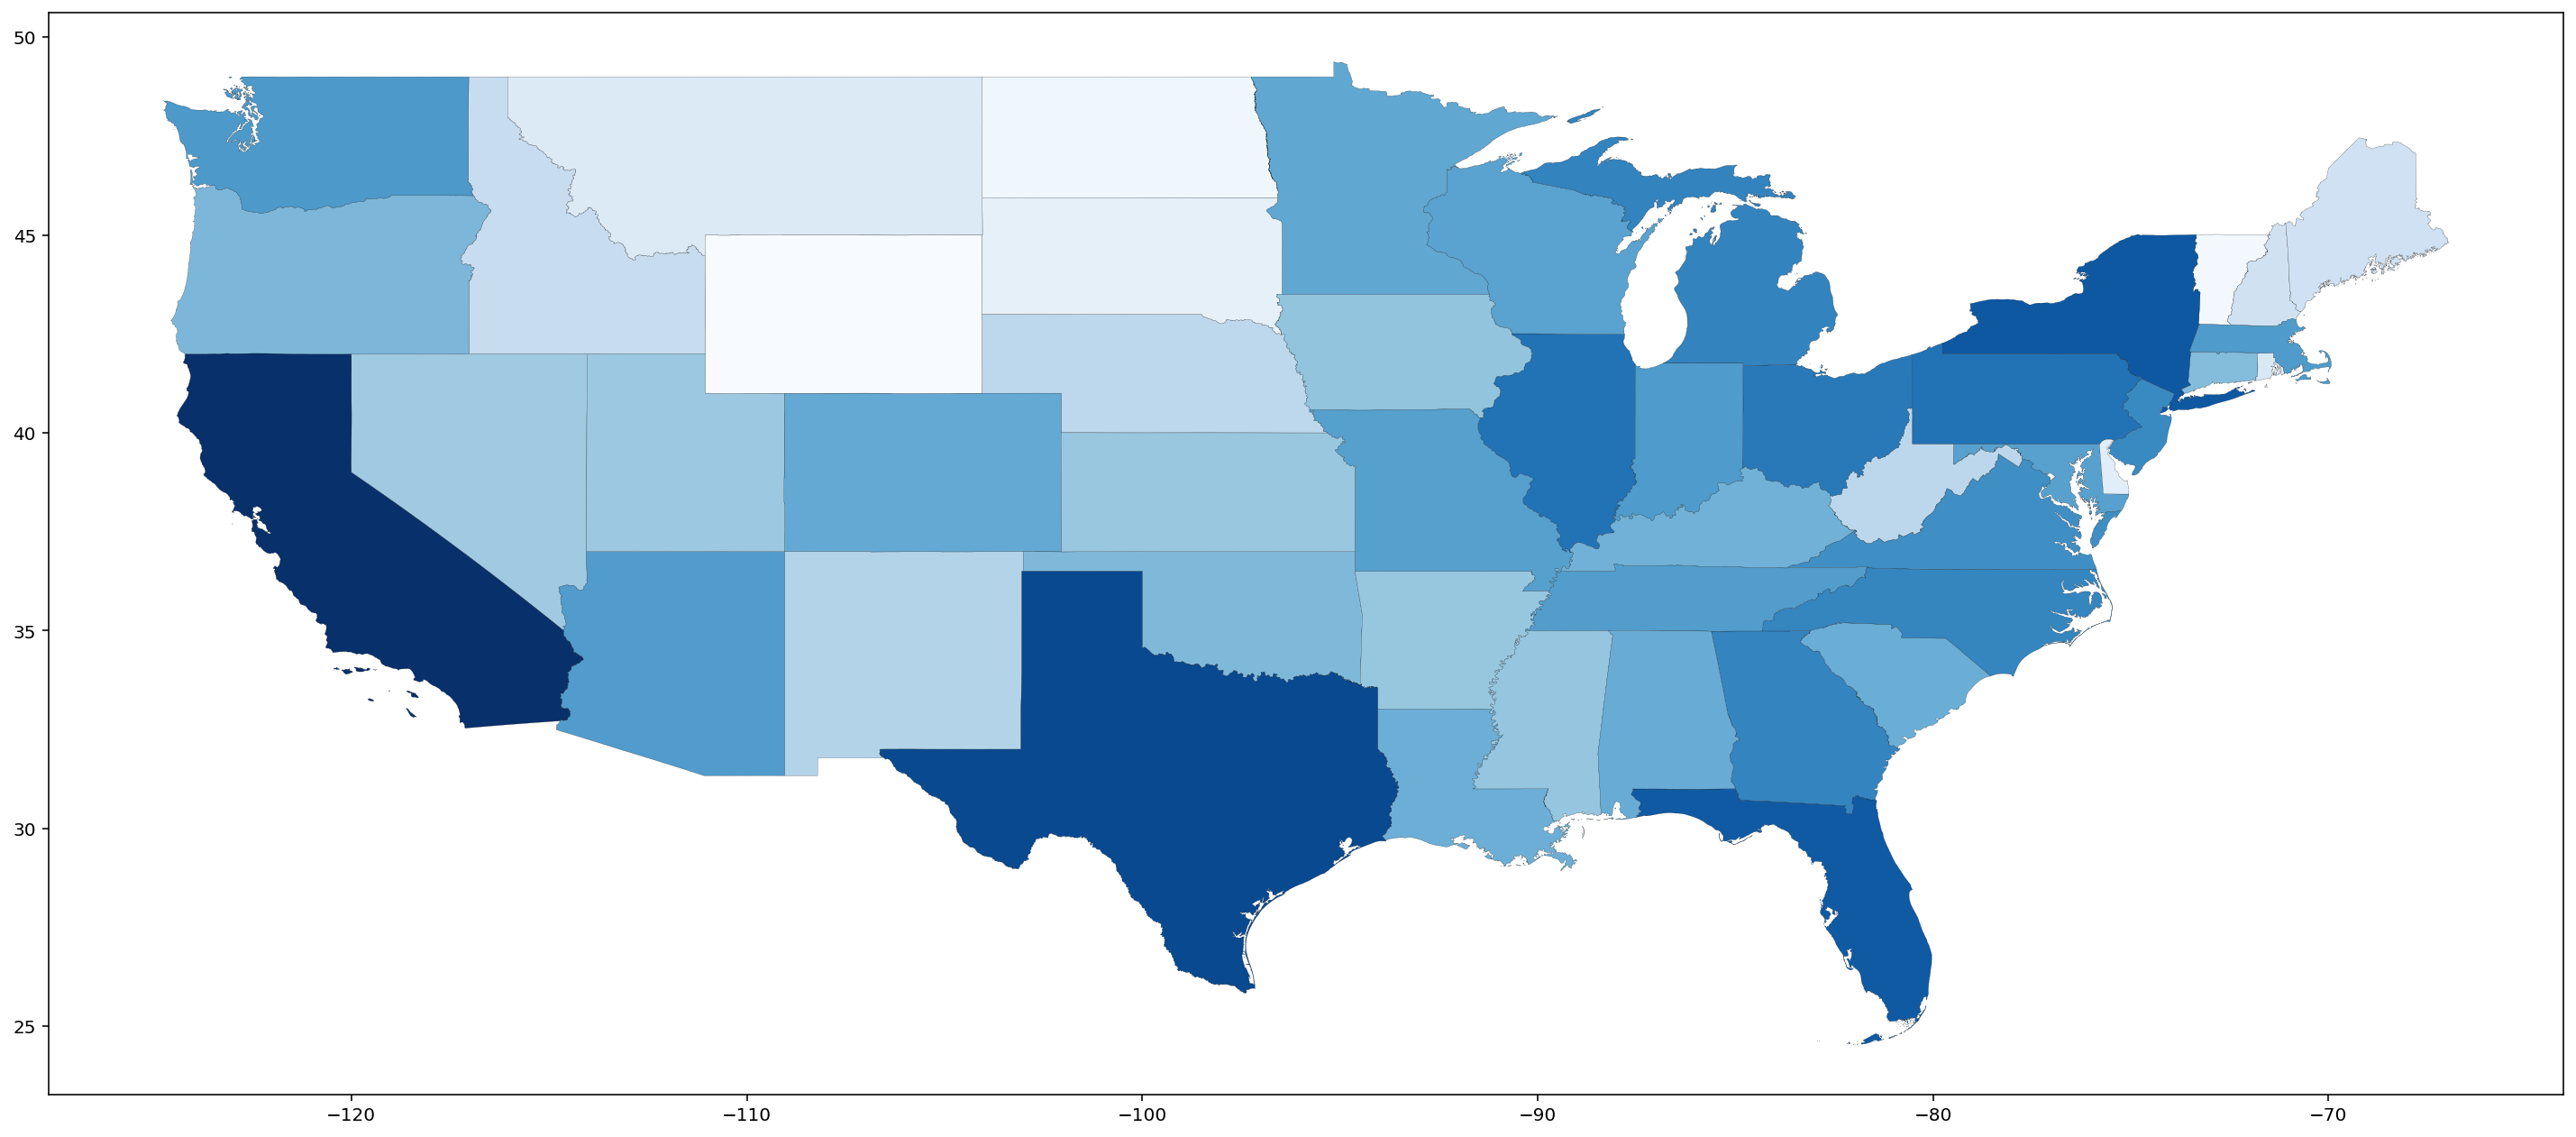

In [36]:
# Augment the df_states geodataframe with population information
states_choropleth = pd.merge(df_states, df_state_population, on='STATEFP')

states_choropleth.plot(
    figsize=(25,25), 
    column='LogPopulation', 
    cmap='Blues',  # select color scheme from http://matplotlib.org/users/colormaps.html
    linewidth=0.1, 
    edgecolor='black'
)

## Plot a Choropleth with Population of US Counties

In [0]:
# Query the US Census API for the population of each county
census_response = census.get(['P001001'], ['in=state:*', 'for=county:*'])
# Manipulate the API response and put the results in a dataframe
df_county_population = pd.DataFrame(census_response[1:], columns = ['Population', 'STATEFP', 'COUNTYFP'])
df_county_population['Population'] = pd.to_numeric(df_county_population['Population'])
df_county_population['LogPopulation'] = np.log10(df_county_population['Population'])
# df_county_population

In [38]:
df_county_population.head(5)

Population STATEFP COUNTYFP  LogPopulation
0      125744      05      131       5.099487
1       17058      05      133       4.231928
2       17264      05      135       4.237141
3       12394      05      137       4.093211
4       41639      05      139       4.619500

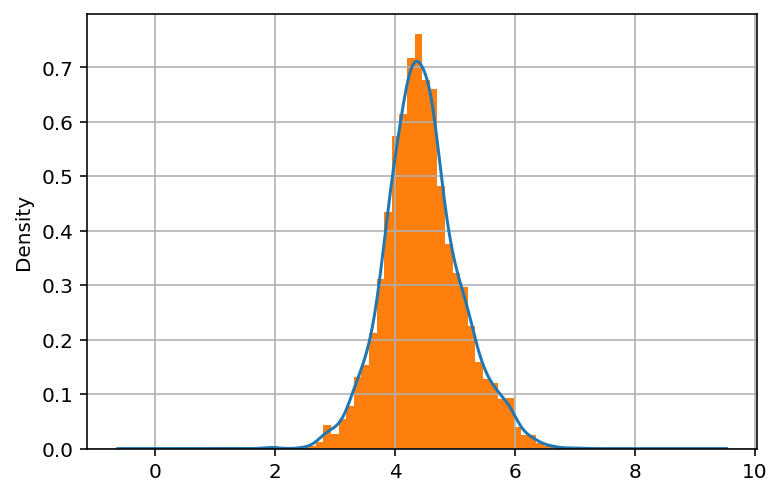

In [39]:
df_county_population.LogPopulation.plot.kde()
df_county_population.LogPopulation.hist(bins=40, density=True)

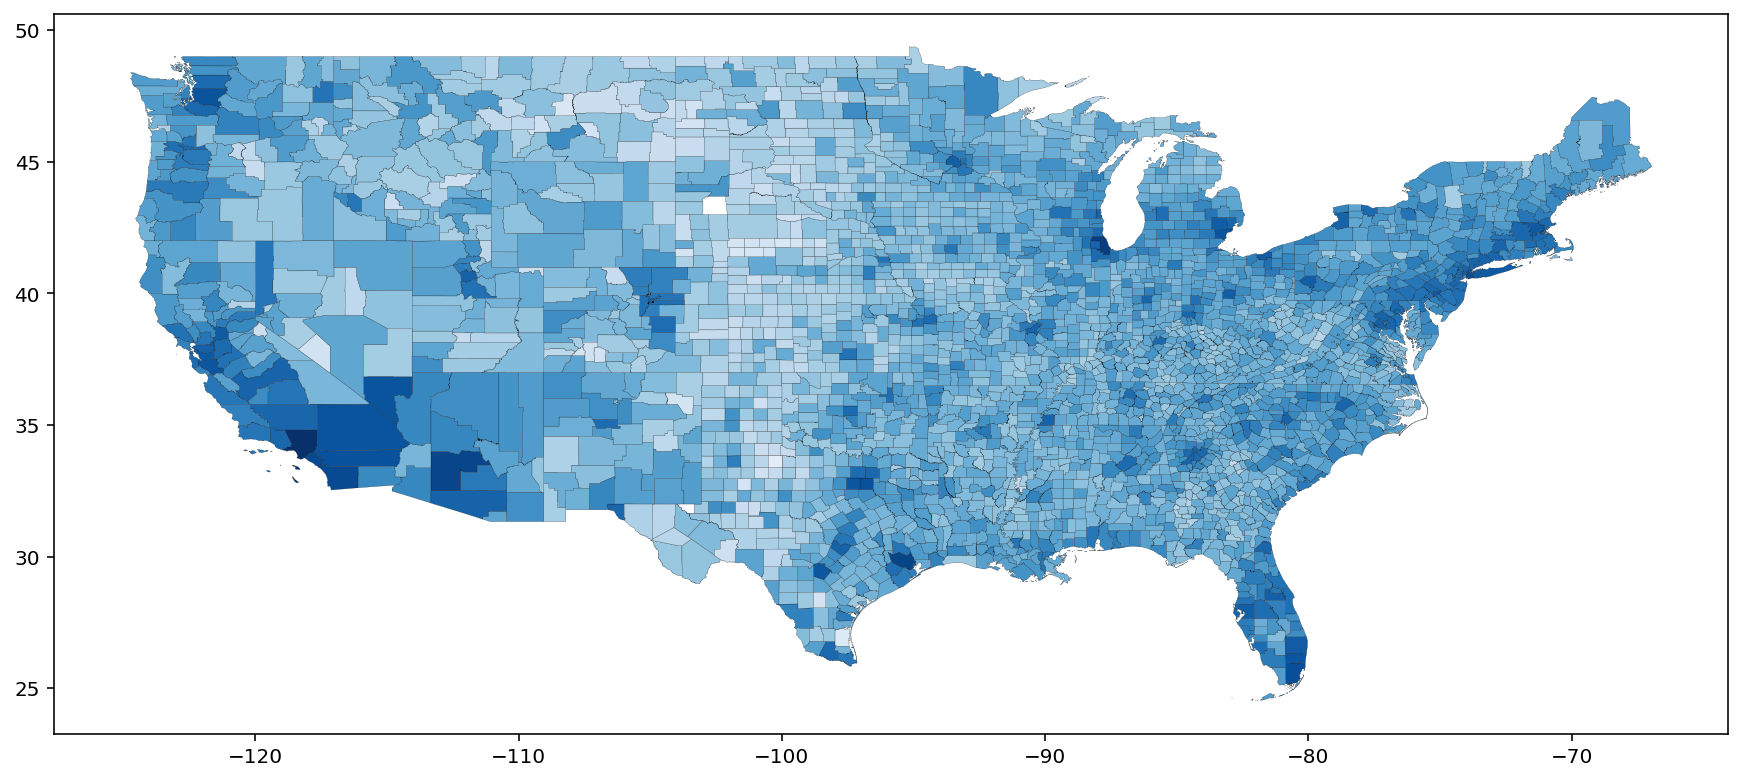

In [40]:
# Merge the GeoDataFrame df_counties with the population data
counties_choropleth = pd.merge(df_counties, df_county_population, on=['STATEFP', 'COUNTYFP'])

counties_choropleth.plot(
    figsize=(15,15), 
    column='LogPopulation', 
    cmap='Blues', # http://matplotlib.org/users/colormaps.html
    # scheme='Quantiles', # alternatives are 'Quantiles', Equal_Interval', and 'Fisher_Jenks'; Quantiles requires PySAL
    linewidth=0.1, 
    edgecolor='black')

## Extras

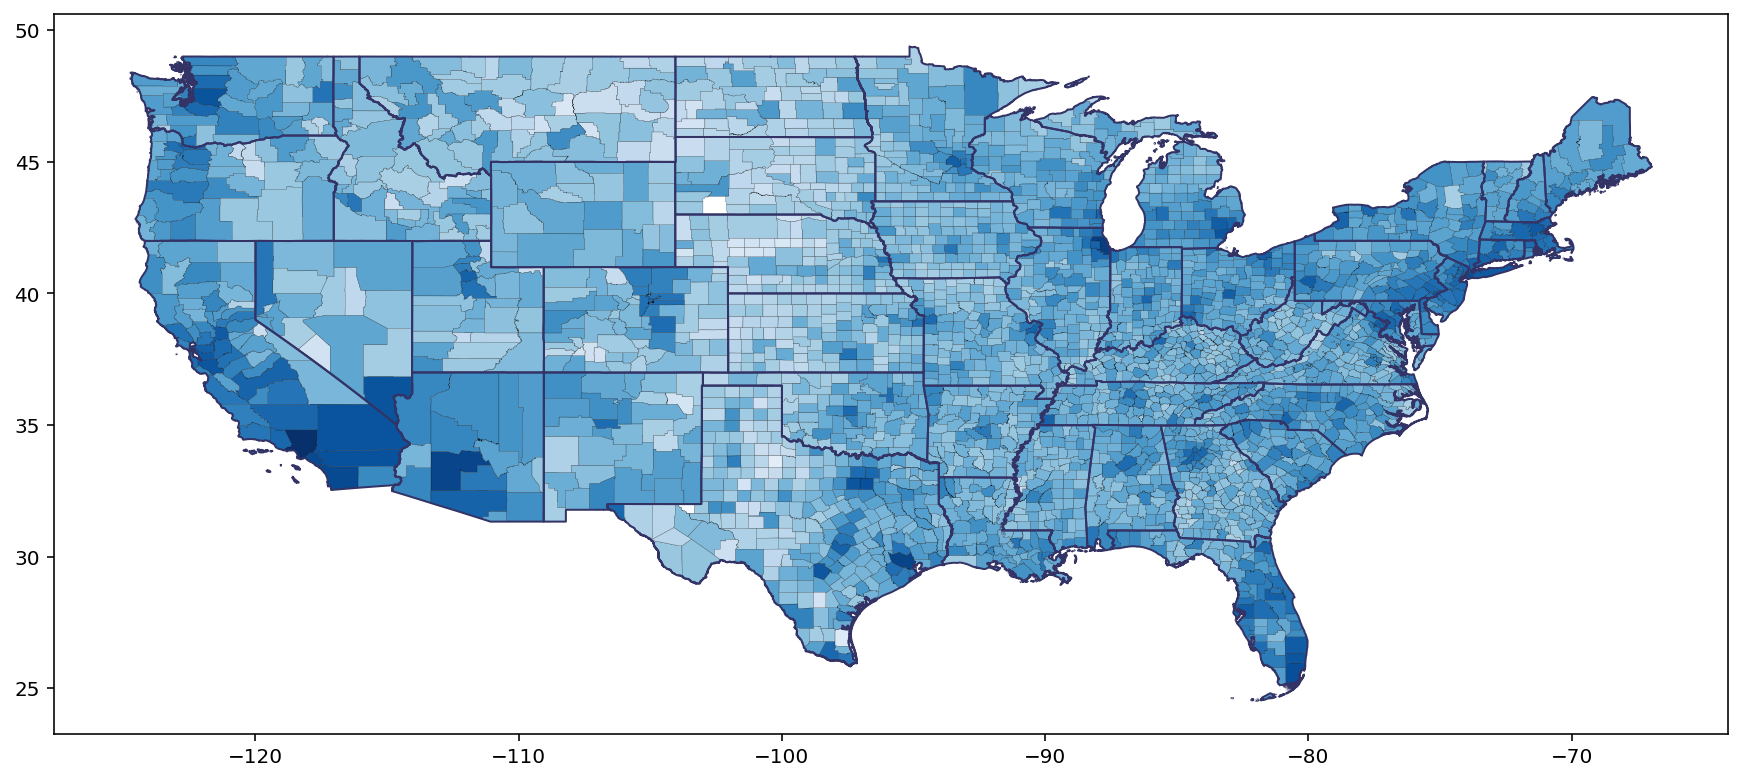

In [41]:
# Plot the state borders (with darker, thicker lines) on top of the counties

ax = counties_choropleth.plot(
    figsize=(15,15), 
    column='LogPopulation', 
    cmap='Blues', # http://matplotlib.org/users/colormaps.html
    # scheme='Quantiles', # alternatives are 'Quantiles', Equal_Interval', and 'Fisher_Jenks'; Quantiles requires PySAL
    linewidth=0.1, 
    edgecolor='black')

df_states.plot(
    figsize=(15,15), 
    linewidth=1, # thicker line
    facecolor='none', # no color for fill
    edgecolor='#333366', # color for the state borders
    ax = ax # plot it on top of the counties plot
)


In [0]:
# Check https://pysal.org/mapclassify/api.html for all the difference schemes
import mapclassify as mc
# scheme = mc.FisherJenks(counties_choropleth['LogPopulation'], k=10)
scheme = mc.Quantiles(counties_choropleth['LogPopulation'],k=100)

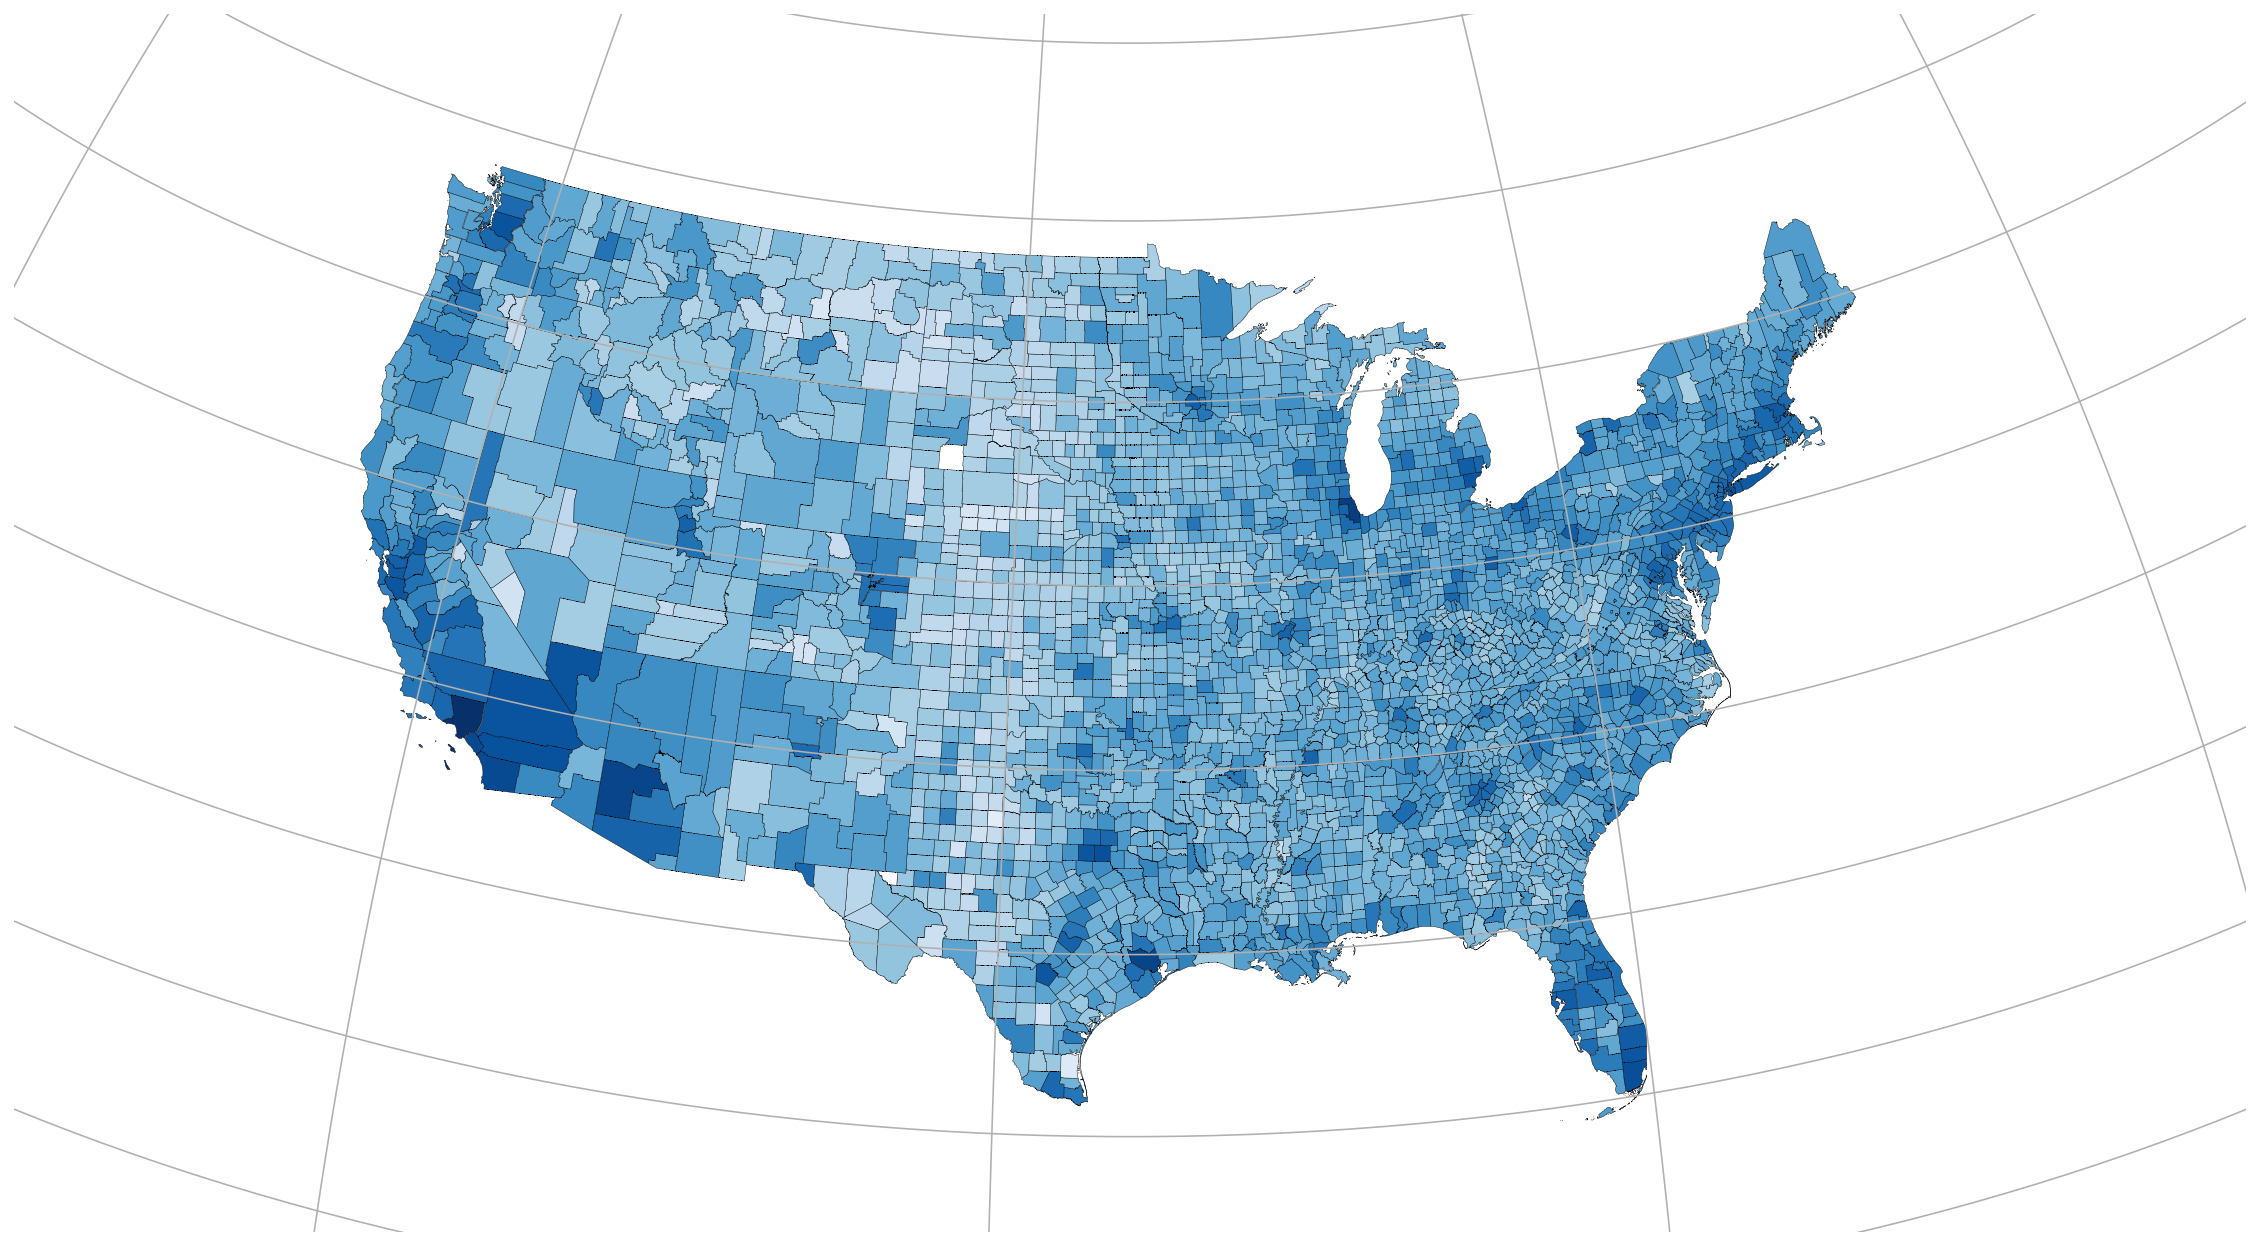

In [43]:
# Changing the projection to Orthographic

geoplot.choropleth(
    counties_choropleth,
    hue='LogPopulation',
    # scheme=scheme,
    cmap='Blues', # try Spectral_r, Spectral, or others from https://matplotlib.org/tutorials/colors/colormaps.html
    linewidth=0.2,
    edgecolor='black',
    projection=gcrs.Orthographic(),
    figsize=(20, 20)
).gridlines() # plot gridlines


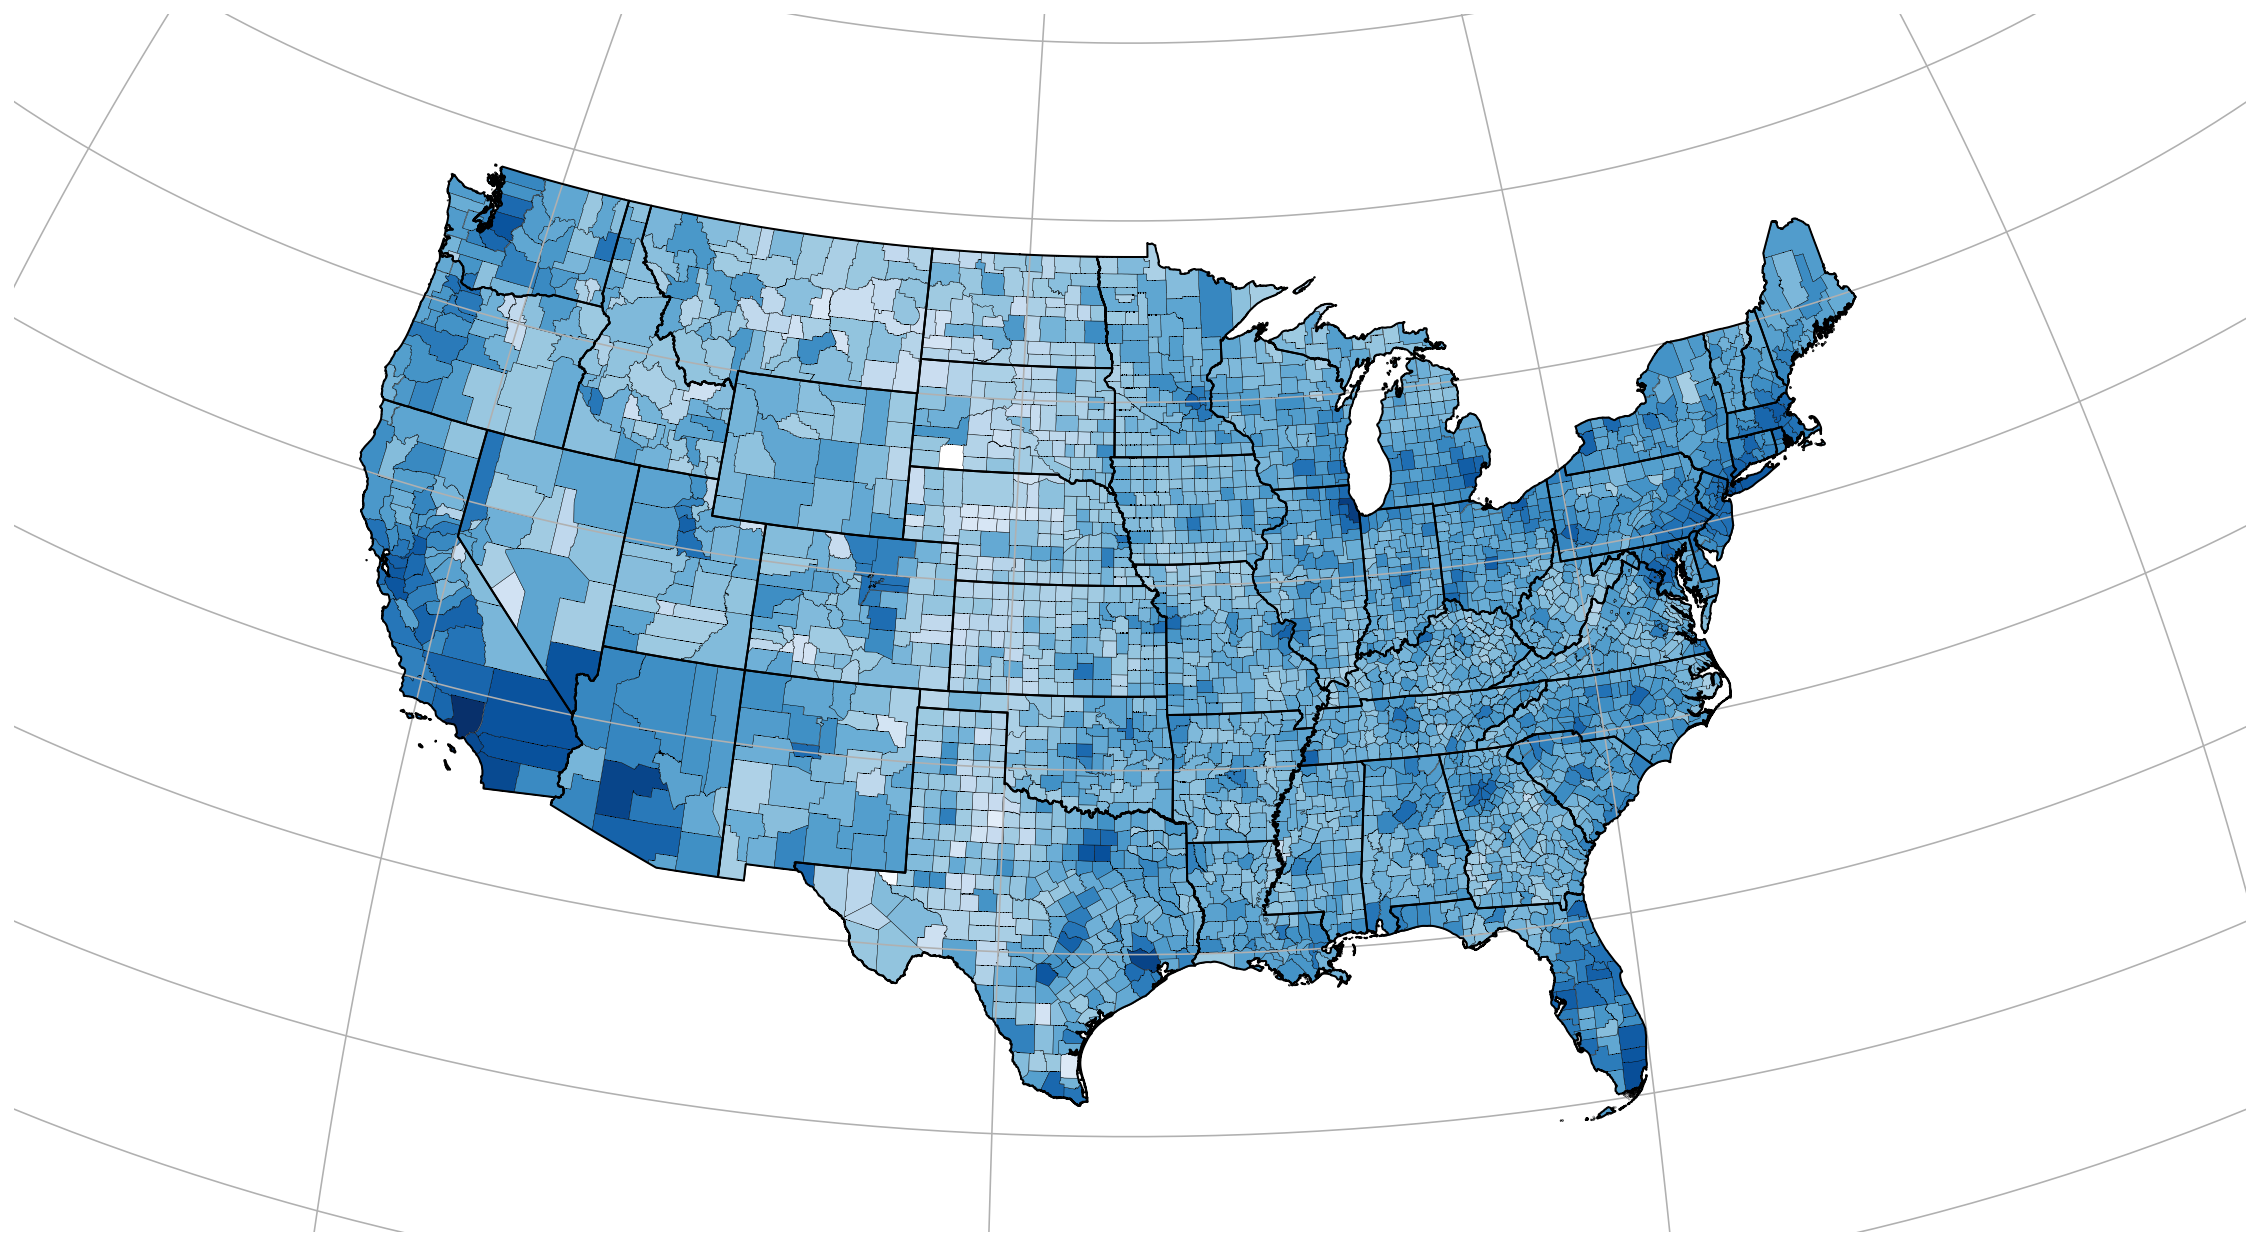

In [44]:
# Add state borders in the geoplot choropleth plot

ax = geoplot.polyplot(
    states_choropleth, 
    projection=gcrs.Orthographic(),
    figsize=(20, 20),
    linewidth = 1,
    zorder = 2
)

geoplot.choropleth(
    counties_choropleth,
    hue='LogPopulation',
    # scheme=scheme,
    cmap='Blues', # try Spectral_r, Spectral, or others from https://matplotlib.org/tutorials/colors/colormaps.html
    linewidth=0.2,
    edgecolor='black',
    projection=gcrs.Orthographic(),
    ax=ax,
    zorder = 0
).gridlines() # plot gridlines



## Unemployment Data

https://www.bls.gov/lau/
    
 * Labor force data by county, not seasonally adjusted, latest 14 months https://www.bls.gov/web/metro/laucntycur14.txt
 
 * Labor force data by county, 2017 annual averages https://www.bls.gov/lau/laucnty17.txt 

In [0]:
url = "https://www.bls.gov/web/metro/laucntycur14.txt"
udf = pd.read_csv(
    url,
    skiprows=6,  # skip the first six lines; 
    header=None,  # we will supply the headers ourselves
    skipfooter=6,  # the last six lines are notes; skip them
    engine='python',  # we need this to use the skipfooter option
    delimiter="|",  # use | as the column delimeter
    # skipinitialspace=True,  # ignore the space characters after the delimeter |
    thousands=",",  # specify that numbers use , for thousand separator
)

In [46]:
udf.head(5)

0  1  2  ...            6           7         8
0   CN0100100000000   1  1  ...       25353         903        3.4
1   CN0100300000000   1  3  ...       92454        3447        3.6
2   CN0100500000000   1  5  ...        8026         394        4.7
3   CN0100700000000   1  7  ...        8358         344        4.0
4   CN0100900000000   1  9  ...       24432         870        3.4

[5 rows x 9 columns]

In [47]:
udf.dtypes

0    object
1     int64
2     int64
3    object
4    object
5    object
6    object
7    object
8    object
dtype: object

In [0]:
udf.columns = ["LAUS", "STATEFP", "COUNTYFP", "County_Name", "Period", 
               "Labor_Force", "Employed", "Unemployed", "Rate"]

In [49]:
udf.head(5)

LAUS  STATEFP  COUNTYFP  ...     Employed  Unemployed      Rate
0   CN0100100000000         1         1  ...       25353         903        3.4
1   CN0100300000000         1         3  ...       92454        3447        3.6
2   CN0100500000000         1         5  ...        8026         394        4.7
3   CN0100700000000         1         7  ...        8358         344        4.0
4   CN0100900000000         1         9  ...       24432         870        3.4

[5 rows x 9 columns]

In [50]:
udf.dtypes

LAUS           object
STATEFP         int64
COUNTYFP        int64
County_Name    object
Period         object
Labor_Force    object
Employed       object
Unemployed     object
Rate           object
dtype: object

In [0]:
# Convert STATEFP and COUNTYFP to strings and add leading zeros
# to allow for merging later on with the geodataframes
# Interestingly, the initial file contains the zeros, but Pandas recognizes
# the entries as numbers and converts to integers, so we are forced to convert back
udf.STATEFP = udf.STATEFP.apply(str).str.zfill(2)
udf.COUNTYFP = udf.COUNTYFP.apply(str).str.zfill(3)

In [52]:
udf.head(5)

LAUS STATEFP COUNTYFP  ...     Employed  Unemployed      Rate
0   CN0100100000000       01      001  ...       25353         903        3.4
1   CN0100300000000       01      003  ...       92454        3447        3.6
2   CN0100500000000       01      005  ...        8026         394        4.7
3   CN0100700000000       01      007  ...        8358         344        4.0
4   CN0100900000000       01      009  ...       24432         870        3.4

[5 rows x 9 columns]

In [0]:
# Using the thousands=","  option in read_csv allows Pandas to understand the 
# data type of these columns properly. If we do not use the option, the 
# code below can convert the values into recognizable numbers to be used by to_numeric
# 
# Need to replace the comma-separator in the numbers with an empty character
# to allow for proper conversion
#
udf.Labor_Force = pd.to_numeric(udf.Labor_Force.str.replace(',',''),errors='coerce')
udf.Employed = pd.to_numeric(udf.Employed.str.replace(',',''),errors='coerce')
udf.Unemployed = pd.to_numeric(udf.Unemployed.str.replace(',',''),errors='coerce')
udf.Rate = pd.to_numeric(udf.Rate,errors='coerce')

In [54]:
# We now want to convert the "Period" to datetime
# Let's take a look at the unique values
udf.Period.drop_duplicates()

0           Feb-19  
3219        Mar-19  
6438        Apr-19  
9657        May-19  
12876       Jun-19  
16095       Jul-19  
19314       Aug-19  
22533       Sep-19  
25752       Oct-19  
28971       Nov-19  
32190       Dec-19  
35409       Jan-20  
38628       Feb-20  
41769     Feb-20(p) 
41847     Mar-20(p) 
Name: Period, dtype: object

In [55]:
# Converting "Period" to a proper date
# We will need to remove spaces 
# We will also need to remove the notes (p) and (y); we need to escape the parentheses
udf.Period = udf.Period.str.replace(' ','')
udf.Period = udf.Period.str.replace('\(p\)','')
udf.Period = udf.Period.str.replace('\(y\)','')
udf.Period.drop_duplicates()

0        Feb-19
3219     Mar-19
6438     Apr-19
9657     May-19
12876    Jun-19
16095    Jul-19
19314    Aug-19
22533    Sep-19
25752    Oct-19
28971    Nov-19
32190    Dec-19
35409    Jan-20
38628    Feb-20
41847    Mar-20
Name: Period, dtype: object

In [0]:
udf.Period = pd.to_datetime(udf.Period, format='%b-%y')

In [57]:
udf.head(5)

LAUS STATEFP COUNTYFP  ... Employed Unemployed  Rate
0   CN0100100000000       01      001  ...  25353.0      903.0   3.4
1   CN0100300000000       01      003  ...  92454.0     3447.0   3.6
2   CN0100500000000       01      005  ...   8026.0      394.0   4.7
3   CN0100700000000       01      007  ...   8358.0      344.0   4.0
4   CN0100900000000       01      009  ...  24432.0      870.0   3.4

[5 rows x 9 columns]

In [58]:
udf.dtypes

LAUS                   object
STATEFP                object
COUNTYFP               object
County_Name            object
Period         datetime64[ns]
Labor_Force           float64
Employed              float64
Unemployed            float64
Rate                  float64
dtype: object

In [59]:
unemployment_average = udf.pivot_table(
    index = ['STATEFP','COUNTYFP', 'County_Name'],
    values = ['Rate','Labor_Force'],
    aggfunc = 'mean'
)

unemployment_average = unemployment_average.reset_index()
unemployment_average.head(5)

STATEFP COUNTYFP  ...   Labor_Force      Rate
0      01      001  ...  26096.857143  2.685714
1      01      003  ...  97157.500000  2.678571
2      01      005  ...   8535.571429  3.700000
3      01      007  ...   8668.142857  3.014286
4      01      009  ...  25287.285714  2.614286

[5 rows x 5 columns]

In [60]:
unemployment_average.Rate.describe()

count    3219.000000
mean        4.220540
std         1.846056
min         0.721429
25%         3.085714
50%         3.792857
75%         4.807143
max        19.107143
Name: Rate, dtype: float64

In [61]:
# County with the highest unemployment rate
unemployment_average [ unemployment_average.Rate == unemployment_average.Rate.max() ]

STATEFP COUNTYFP  ...  Labor_Force       Rate
81      02      158  ...  2671.714286  19.107143

[1 rows x 5 columns]

In [62]:
# County with the lowest unemployment rate
unemployment_average [ unemployment_average.Rate == unemployment_average.Rate.min() ]

STATEFP COUNTYFP  ... Labor_Force      Rate
2672      48      301  ...  589.285714  0.721429

[1 rows x 5 columns]

In [63]:
# County with the median unemployment rate
unemployment_average [ unemployment_average.Rate == unemployment_average.Rate.median() ]

STATEFP COUNTYFP  ...    Labor_Force      Rate
402       13      031  ...   36578.928571  3.792857
475       13      179  ...   26210.785714  3.792857
1886      36      119  ...  484999.571429  3.792857

[3 rows x 5 columns]

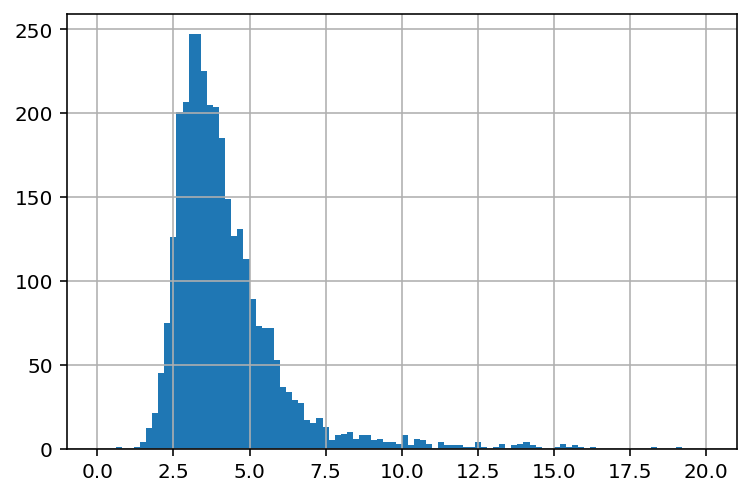

In [64]:
unemployment_average.Rate.hist(bins=100,range=(0,20))

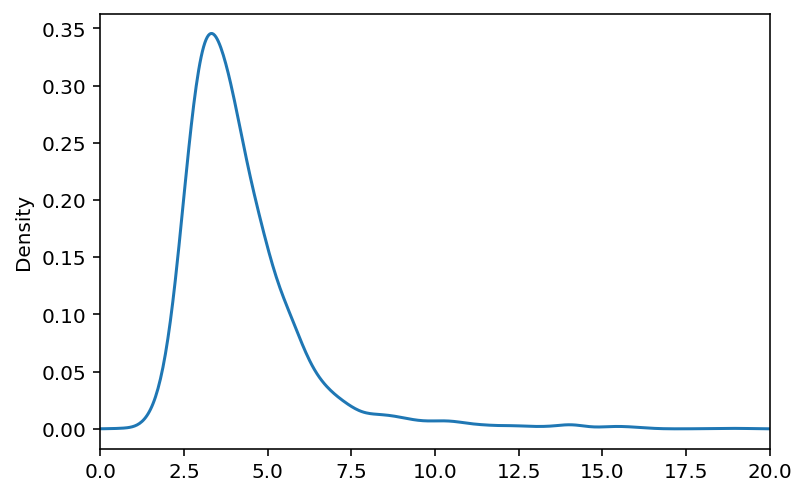

In [65]:
unemployment_average.Rate.plot.kde(xlim=(0,20))

Text(0.5, 0, 'Unemployment Rate (%)')

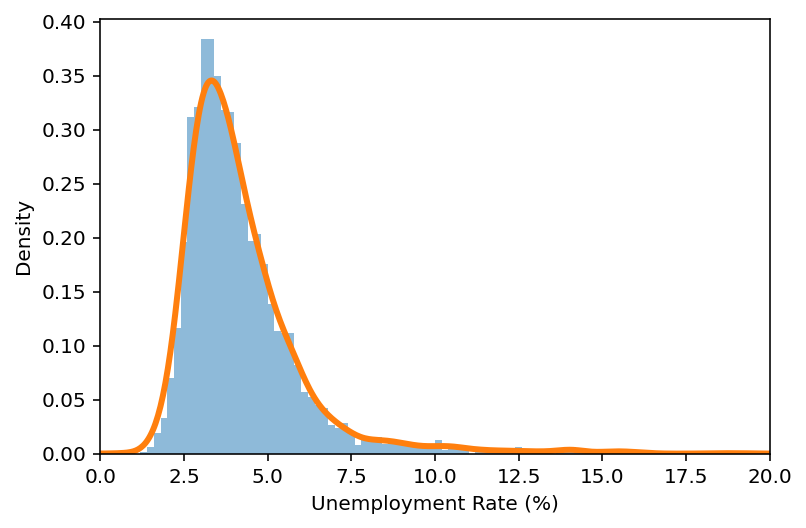

In [66]:
ax = unemployment_average.Rate.hist(bins=100,range=(0,20), density=True, alpha=0.5)
ax = unemployment_average.Rate.plot.kde(xlim=(0,20), ax=ax, linewidth=3)
ax.set_xlabel("Unemployment Rate (%)")

In [0]:
# Merge the GeoDataFrame df_counties with the unemployment data
# Note that this will drop the rates for counties in Alaska and Hawaii
# as this is an inner join, and we have dropped from df_counties Alaska and Hawaii
unemployment_choropleth = pd.merge(df_counties, unemployment_average, on=['STATEFP', 'COUNTYFP'])

In [0]:
# Rank the unemployment rates
unemployment_choropleth['rate_percentile'] = unemployment_choropleth['Rate'].rank(pct=True)

In [69]:
unemployment_choropleth.head(5)

STATEFP COUNTYFP  COUNTYNS  ...   Labor_Force      Rate rate_percentile
0      01      005  00161528  ...   8535.571429  3.700000        0.484556
1      01      023  00161537  ...   4614.785714  4.700000        0.755470
2      01      035  00161543  ...   4514.714286  3.907143        0.553411
3      01      051  00161551  ...  37457.071429  2.592857        0.089929
4      01      065  00161558  ...   6129.785714  3.928571        0.558559

[5 rows x 14 columns]

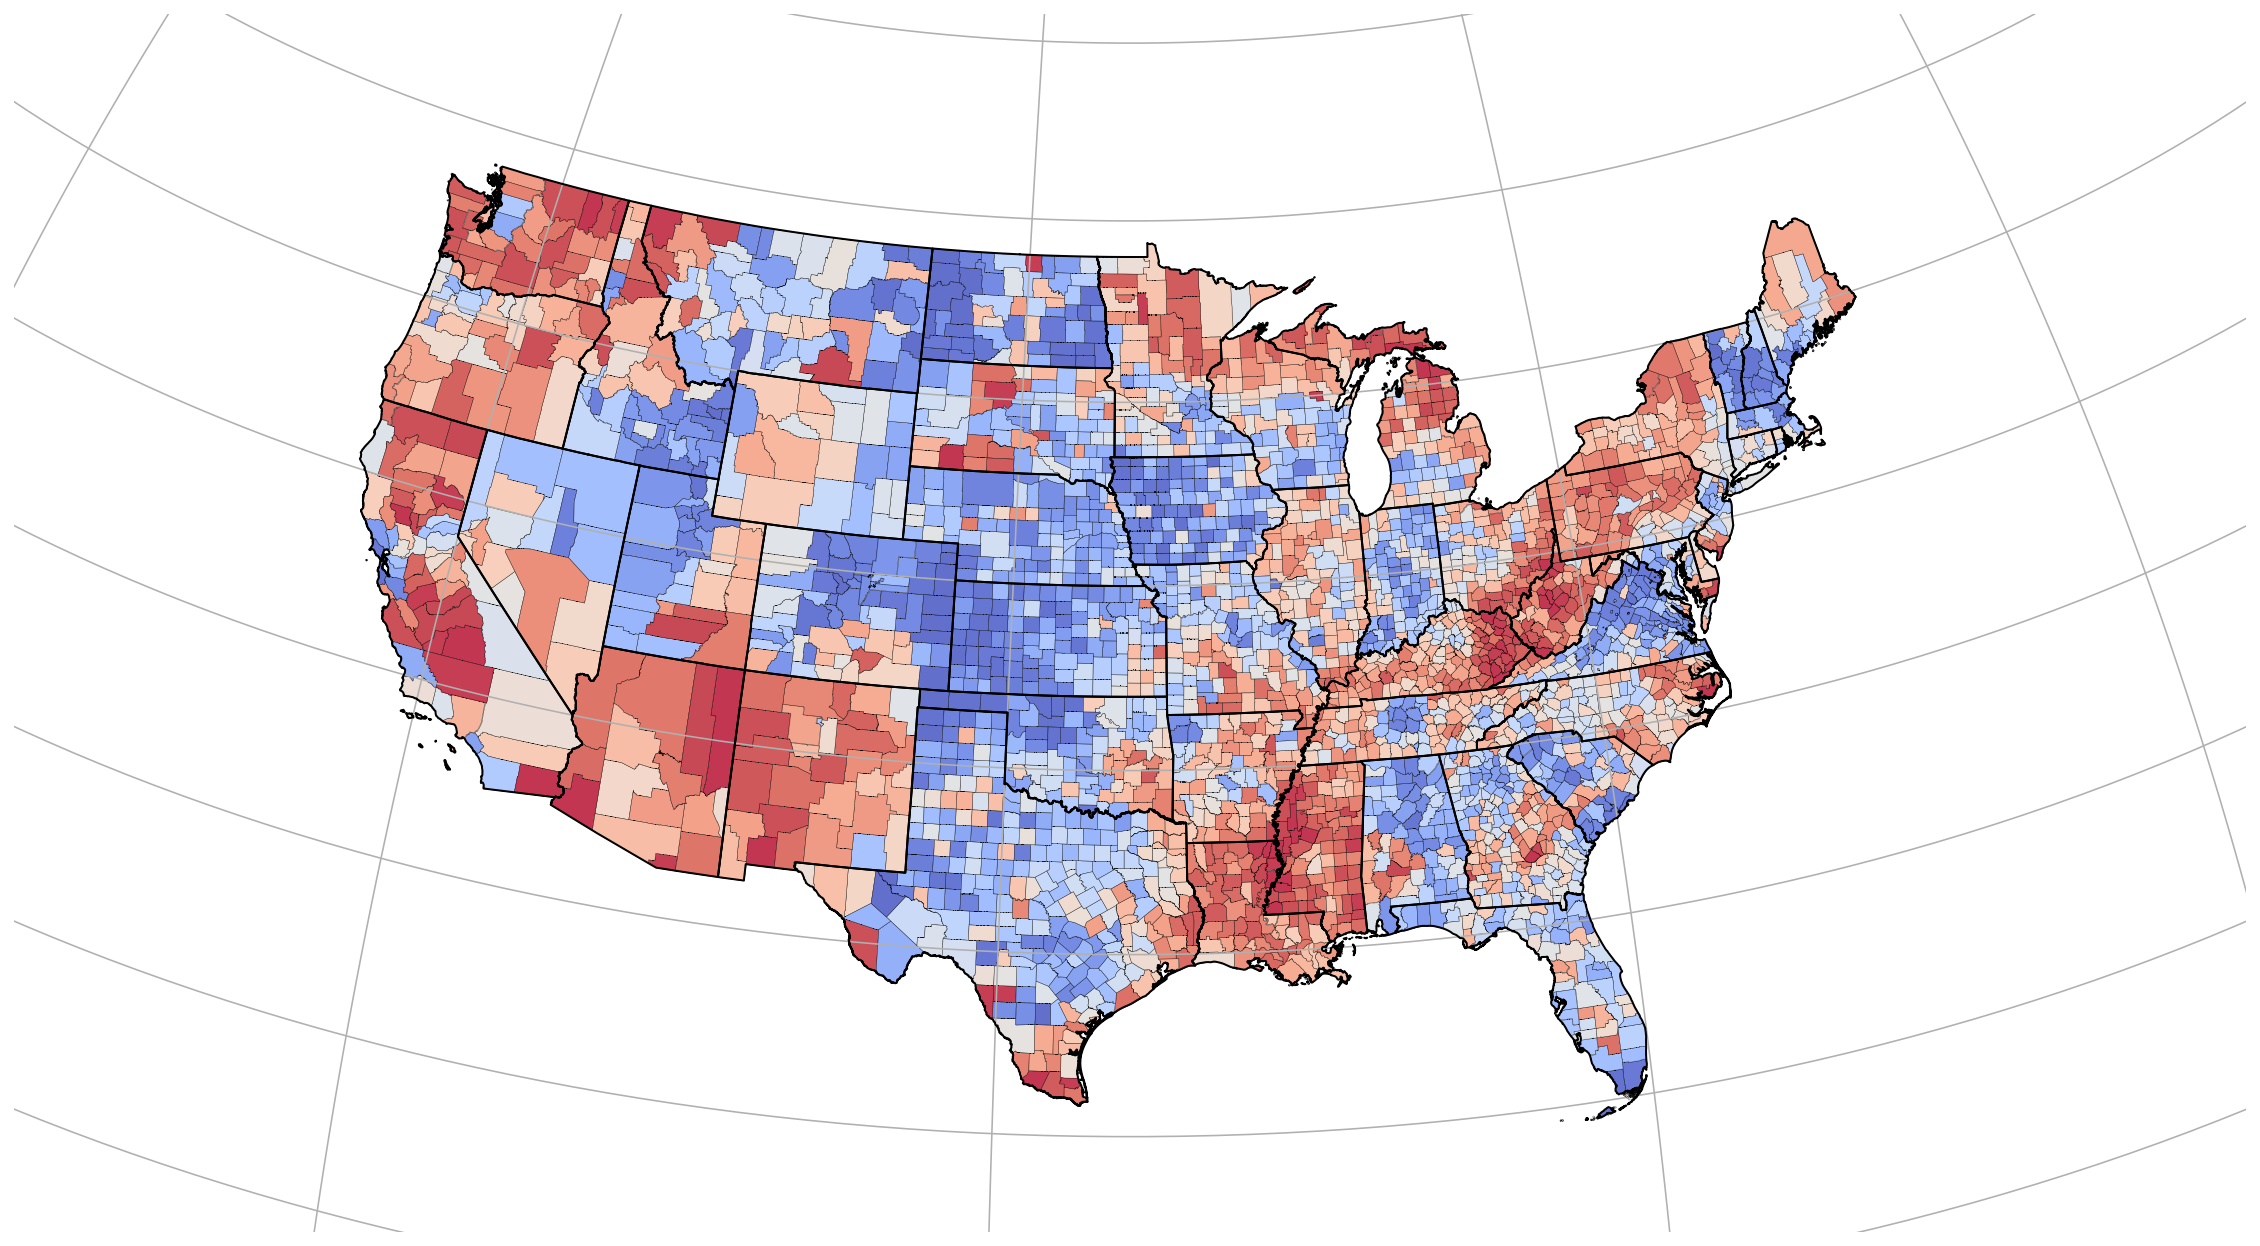

In [70]:
# Compare with https://www.bls.gov/web/metro/twmcort.pdf

ax = geoplot.polyplot(
    df_states, 
    projection=gcrs.Orthographic(),
    figsize=(20, 20),
    linewidth = 1,
    zorder = 2
)

scheme = mc.Quantiles(unemployment_choropleth['Rate'],k=100)

geoplot.choropleth(
    unemployment_choropleth,
    hue='Rate',
    scheme=scheme,
    cmap='coolwarm', # try RdYlBu_r, RdBu_r, Spectral_r, Spectral, or others from https://matplotlib.org/tutorials/colors/colormaps.html
    linewidth=0.2,
    edgecolor='black',
    projection=gcrs.Orthographic(),
    ax=ax,
    alpha=0.8,
    zorder = 0
).gridlines() # plot gridlines


### Extra: Saving quantiles as a separate column

In [0]:
num_quantiles = 10

In [0]:
quantiles = pd.qcut(unemployment_choropleth.Rate, num_quantiles)

In [73]:
# Let's see the ranges for the quantiles
quantiles.drop_duplicates().sort_values()

3       (0.72, 2.643]
6      (2.643, 2.943]
5        (2.943, 3.2]
10       (3.2, 3.457]
0      (3.457, 3.757]
2      (3.757, 4.044]
9      (4.044, 4.457]
1      (4.457, 4.936]
8      (4.936, 5.743]
14    (5.743, 18.343]
Name: Rate, dtype: category
Categories (10, interval[float64]): [(0.72, 2.643] < (2.643, 2.943] < (2.943, 3.2] < (3.2, 3.457] < ... <
                                     (4.044, 4.457] < (4.457, 4.936] < (4.936, 5.743] <
                                     (5.743, 18.343]]

In [0]:
# We use the labels=Fase to get a number (0,1,2,3...) instead of the range labels 
unemployment_choropleth["qRate"] = pd.qcut(unemployment_choropleth.Rate, num_quantiles, labels=False)
unemployment_choropleth["Rate_range"] = pd.qcut(unemployment_choropleth.Rate, num_quantiles)

In [75]:
unemployment_choropleth.head(5)

STATEFP COUNTYFP  COUNTYNS  ... rate_percentile qRate      Rate_range
0      01      005  00161528  ...        0.484556     4  (3.457, 3.757]
1      01      023  00161537  ...        0.755470     7  (4.457, 4.936]
2      01      035  00161543  ...        0.553411     5  (3.757, 4.044]
3      01      051  00161551  ...        0.089929     0   (0.72, 2.643]
4      01      065  00161558  ...        0.558559     5  (3.757, 4.044]

[5 rows x 16 columns]

### Mitigating map visualization bias: Area vs Population

In the example above, where we visualize unemployment rates per county, we introduce a bias: Areas with large area get more prominently displayed. We can try to mitigate this bias, by using cartograms, which scale each area based on a factor that we desire. 

* **County weight proportional to county area**: Scaling factor `constant` (the default).
* **County weight equal across all counties**: Scaling factor proportional to `1/area`
* **County weight proportional to county population**: Scaling factor proportional to `population/area`

So, for example, if we want each country to have an area proportional to its **population** instead of its **area**, we may want to use Density (population divided by area)

In [0]:
# Density = Population / Area
unemployment_choropleth["Density"] = unemployment_choropleth.Labor_Force / unemployment_choropleth.ALAND

In [0]:
# Normalize density to have a minimum value of 1... 
# Alternatively, we can do it to have a max value of 1 by dividing with max
unemployment_choropleth["Density"] = unemployment_choropleth.Density / unemployment_choropleth.Density.min()

In [0]:
# Take the log, as densities are roughly log-normally distributed (as is population)
# We also normalize it by dividing with the max value (to make it 0...1 )
# Finally we add a multiplicative factor of mult_factor
mult_factor = 1.5
unemployment_choropleth["LogDensity"] = mult_factor * np.log10(unemployment_choropleth.Density)/np.log10(unemployment_choropleth.Density.max())

In [79]:
# Statistics on LogDensity values
unemployment_choropleth.LogDensity.describe()

count    3108.000000
mean        0.608182
std         0.208764
min         0.000000
25%         0.487362
50%         0.602591
75%         0.724594
max         1.500000
Name: LogDensity, dtype: float64

Text(0.5, 0, 'County Population Density (log-scale)')

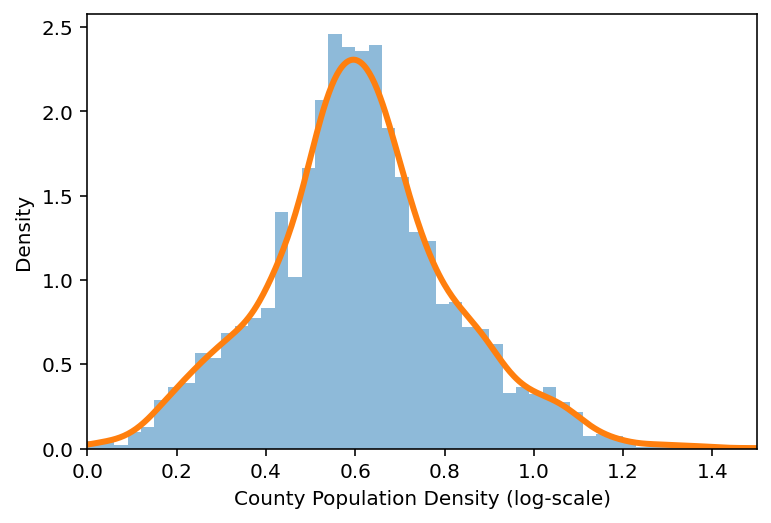

In [80]:
ax = unemployment_choropleth.LogDensity.hist(bins=50,range=(0,mult_factor), density=True, alpha=0.5)
ax = unemployment_choropleth.LogDensity.plot.kde(xlim=(0,mult_factor), ax=ax, linewidth=3)
ax.set_xlabel("County Population Density (log-scale, normalized)")

In [81]:
unemployment_choropleth[ unemployment_choropleth.Density == unemployment_choropleth.Density.max()]

STATEFP COUNTYFP  COUNTYNS  ...    Rate_range        Density LogDensity
3000      36      061  00974129  ...  (3.2, 3.457]  324742.766592        1.5

[1 rows x 18 columns]

In [0]:
density_min = unemployment_choropleth.LogDensity.min()
density_max = unemployment_choropleth.LogDensity.max()

In [83]:
density_min

0.0

In [84]:
density_max

1.5

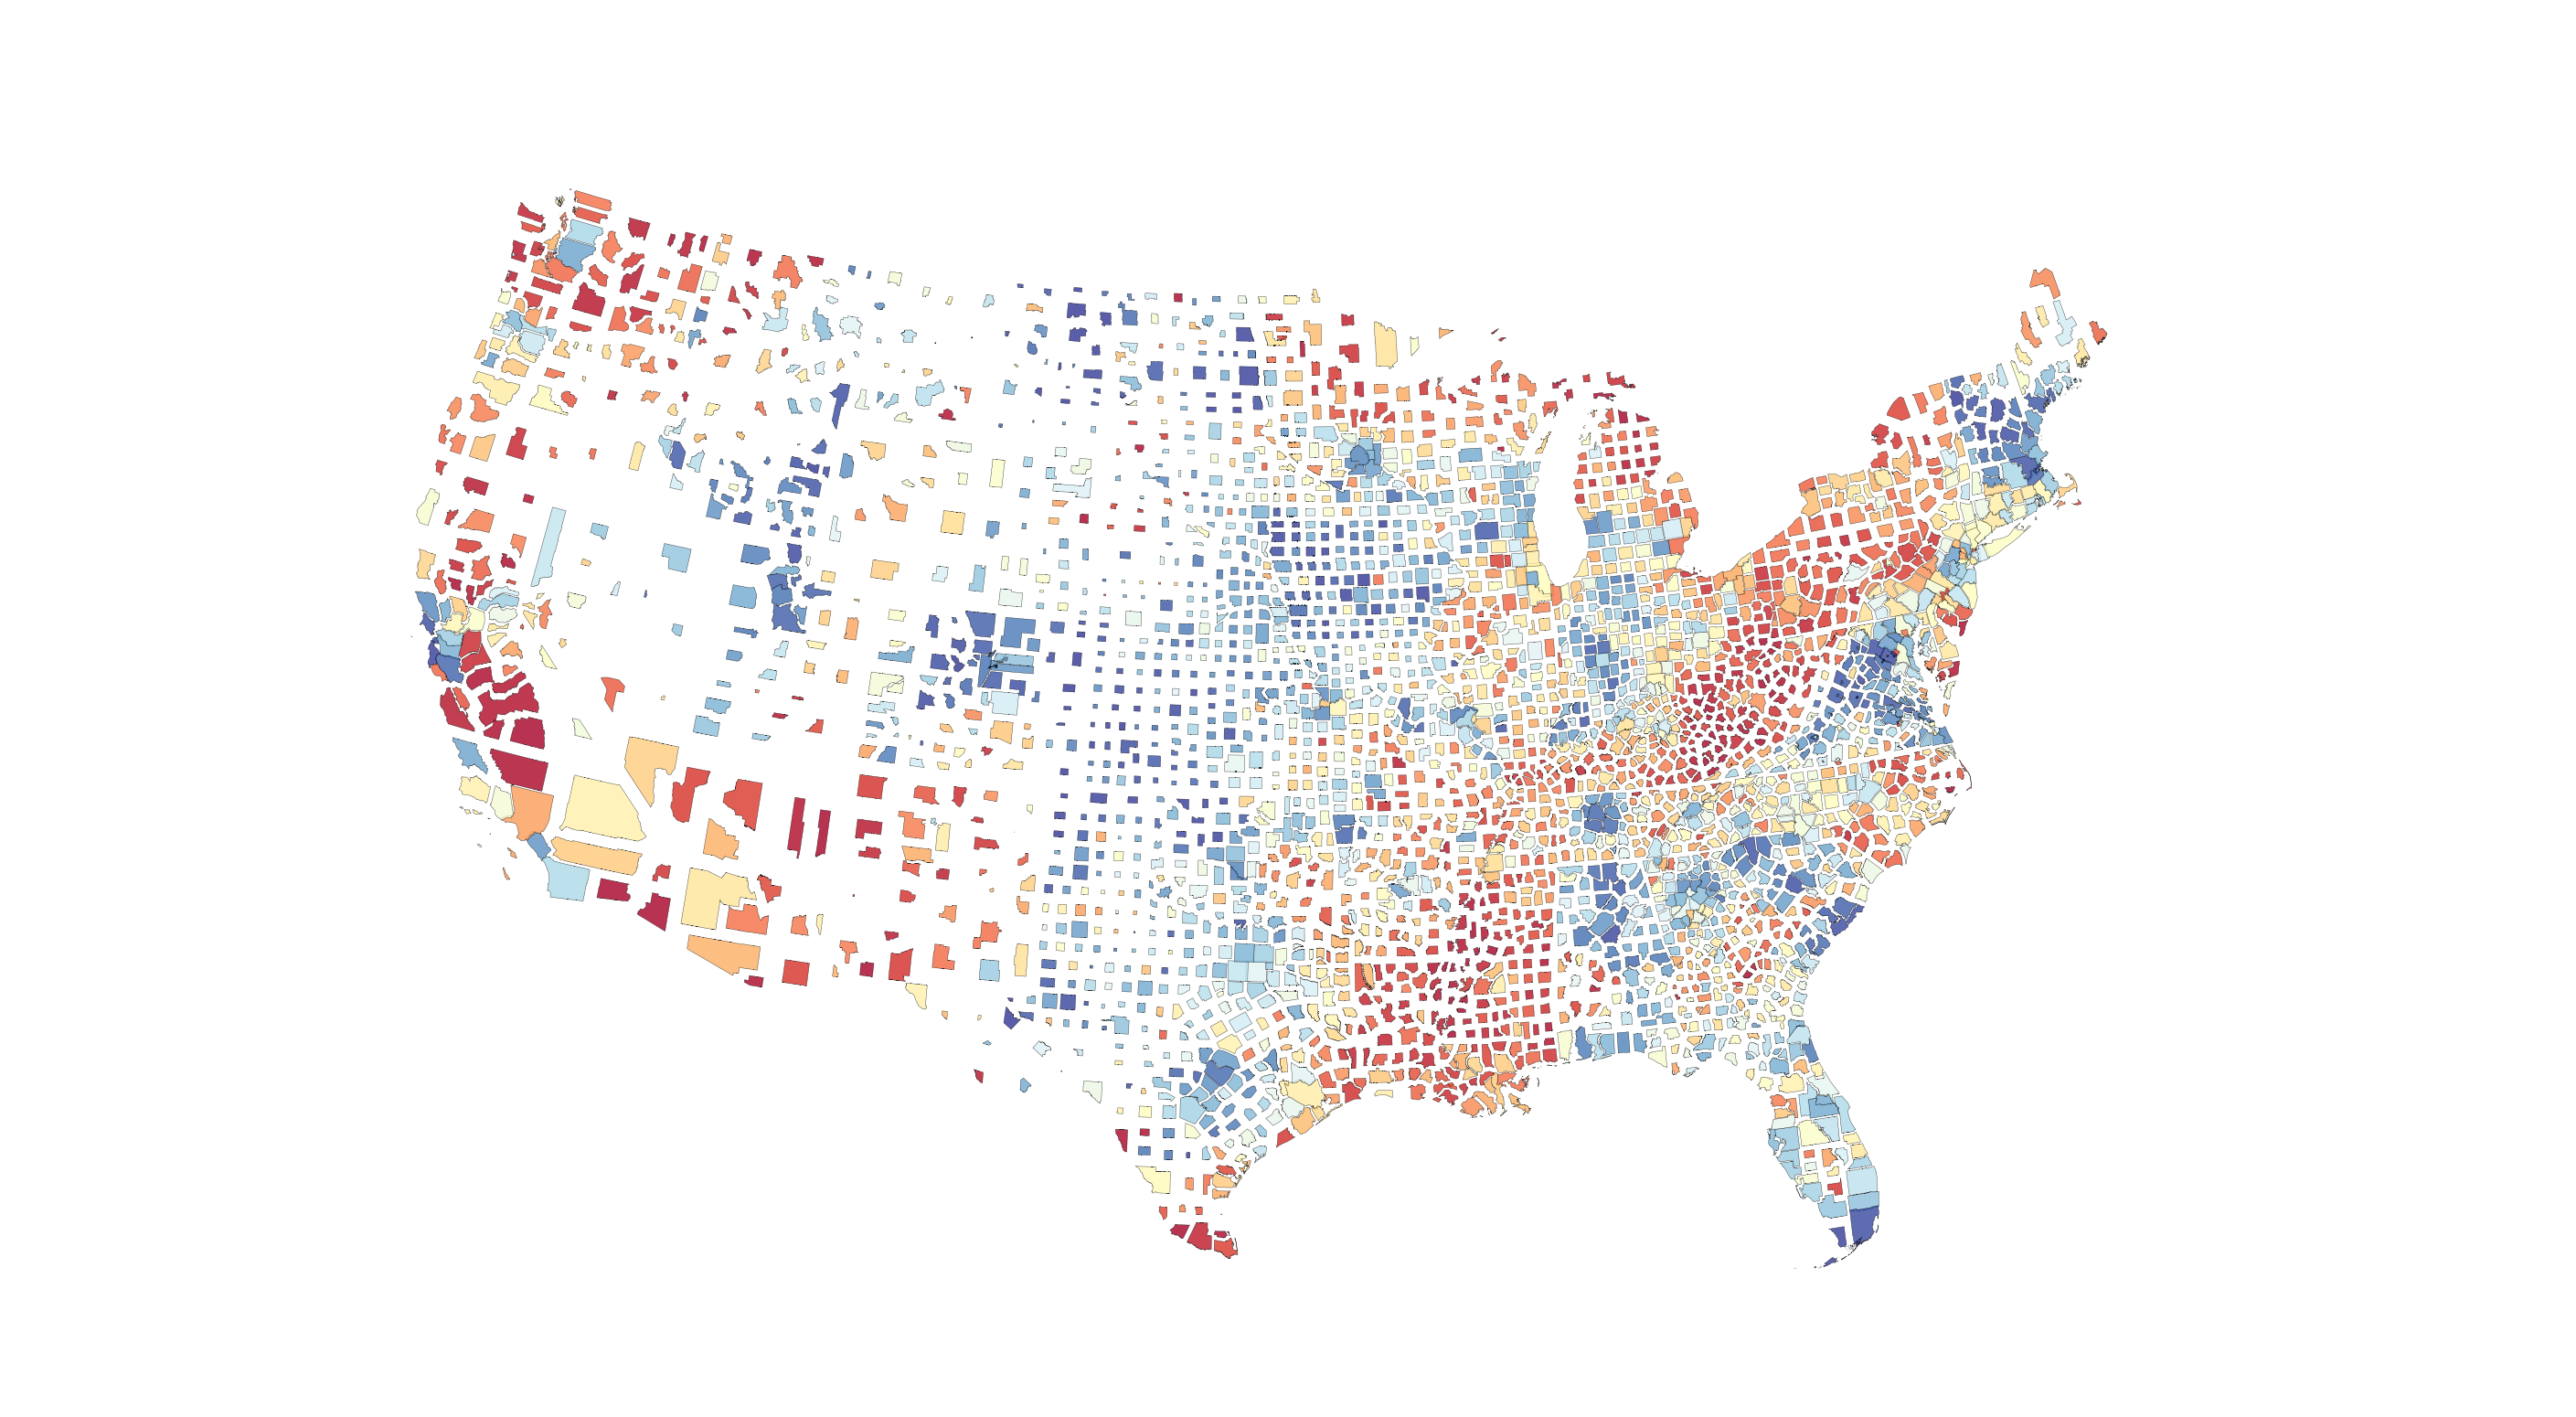

In [85]:
geoplot.cartogram(
    unemployment_choropleth,
    scale='LogDensity',
    limits=(density_min,density_max),
    projection=gcrs.Orthographic(),
    scheme=mc.Quantiles(unemployment_choropleth['Rate'],k=100),
    hue='Rate',
    cmap='RdYlBu_r',
    linewidth=0.2,
    edgecolor='black',
    alpha=0.8,
    figsize=(25, 25))

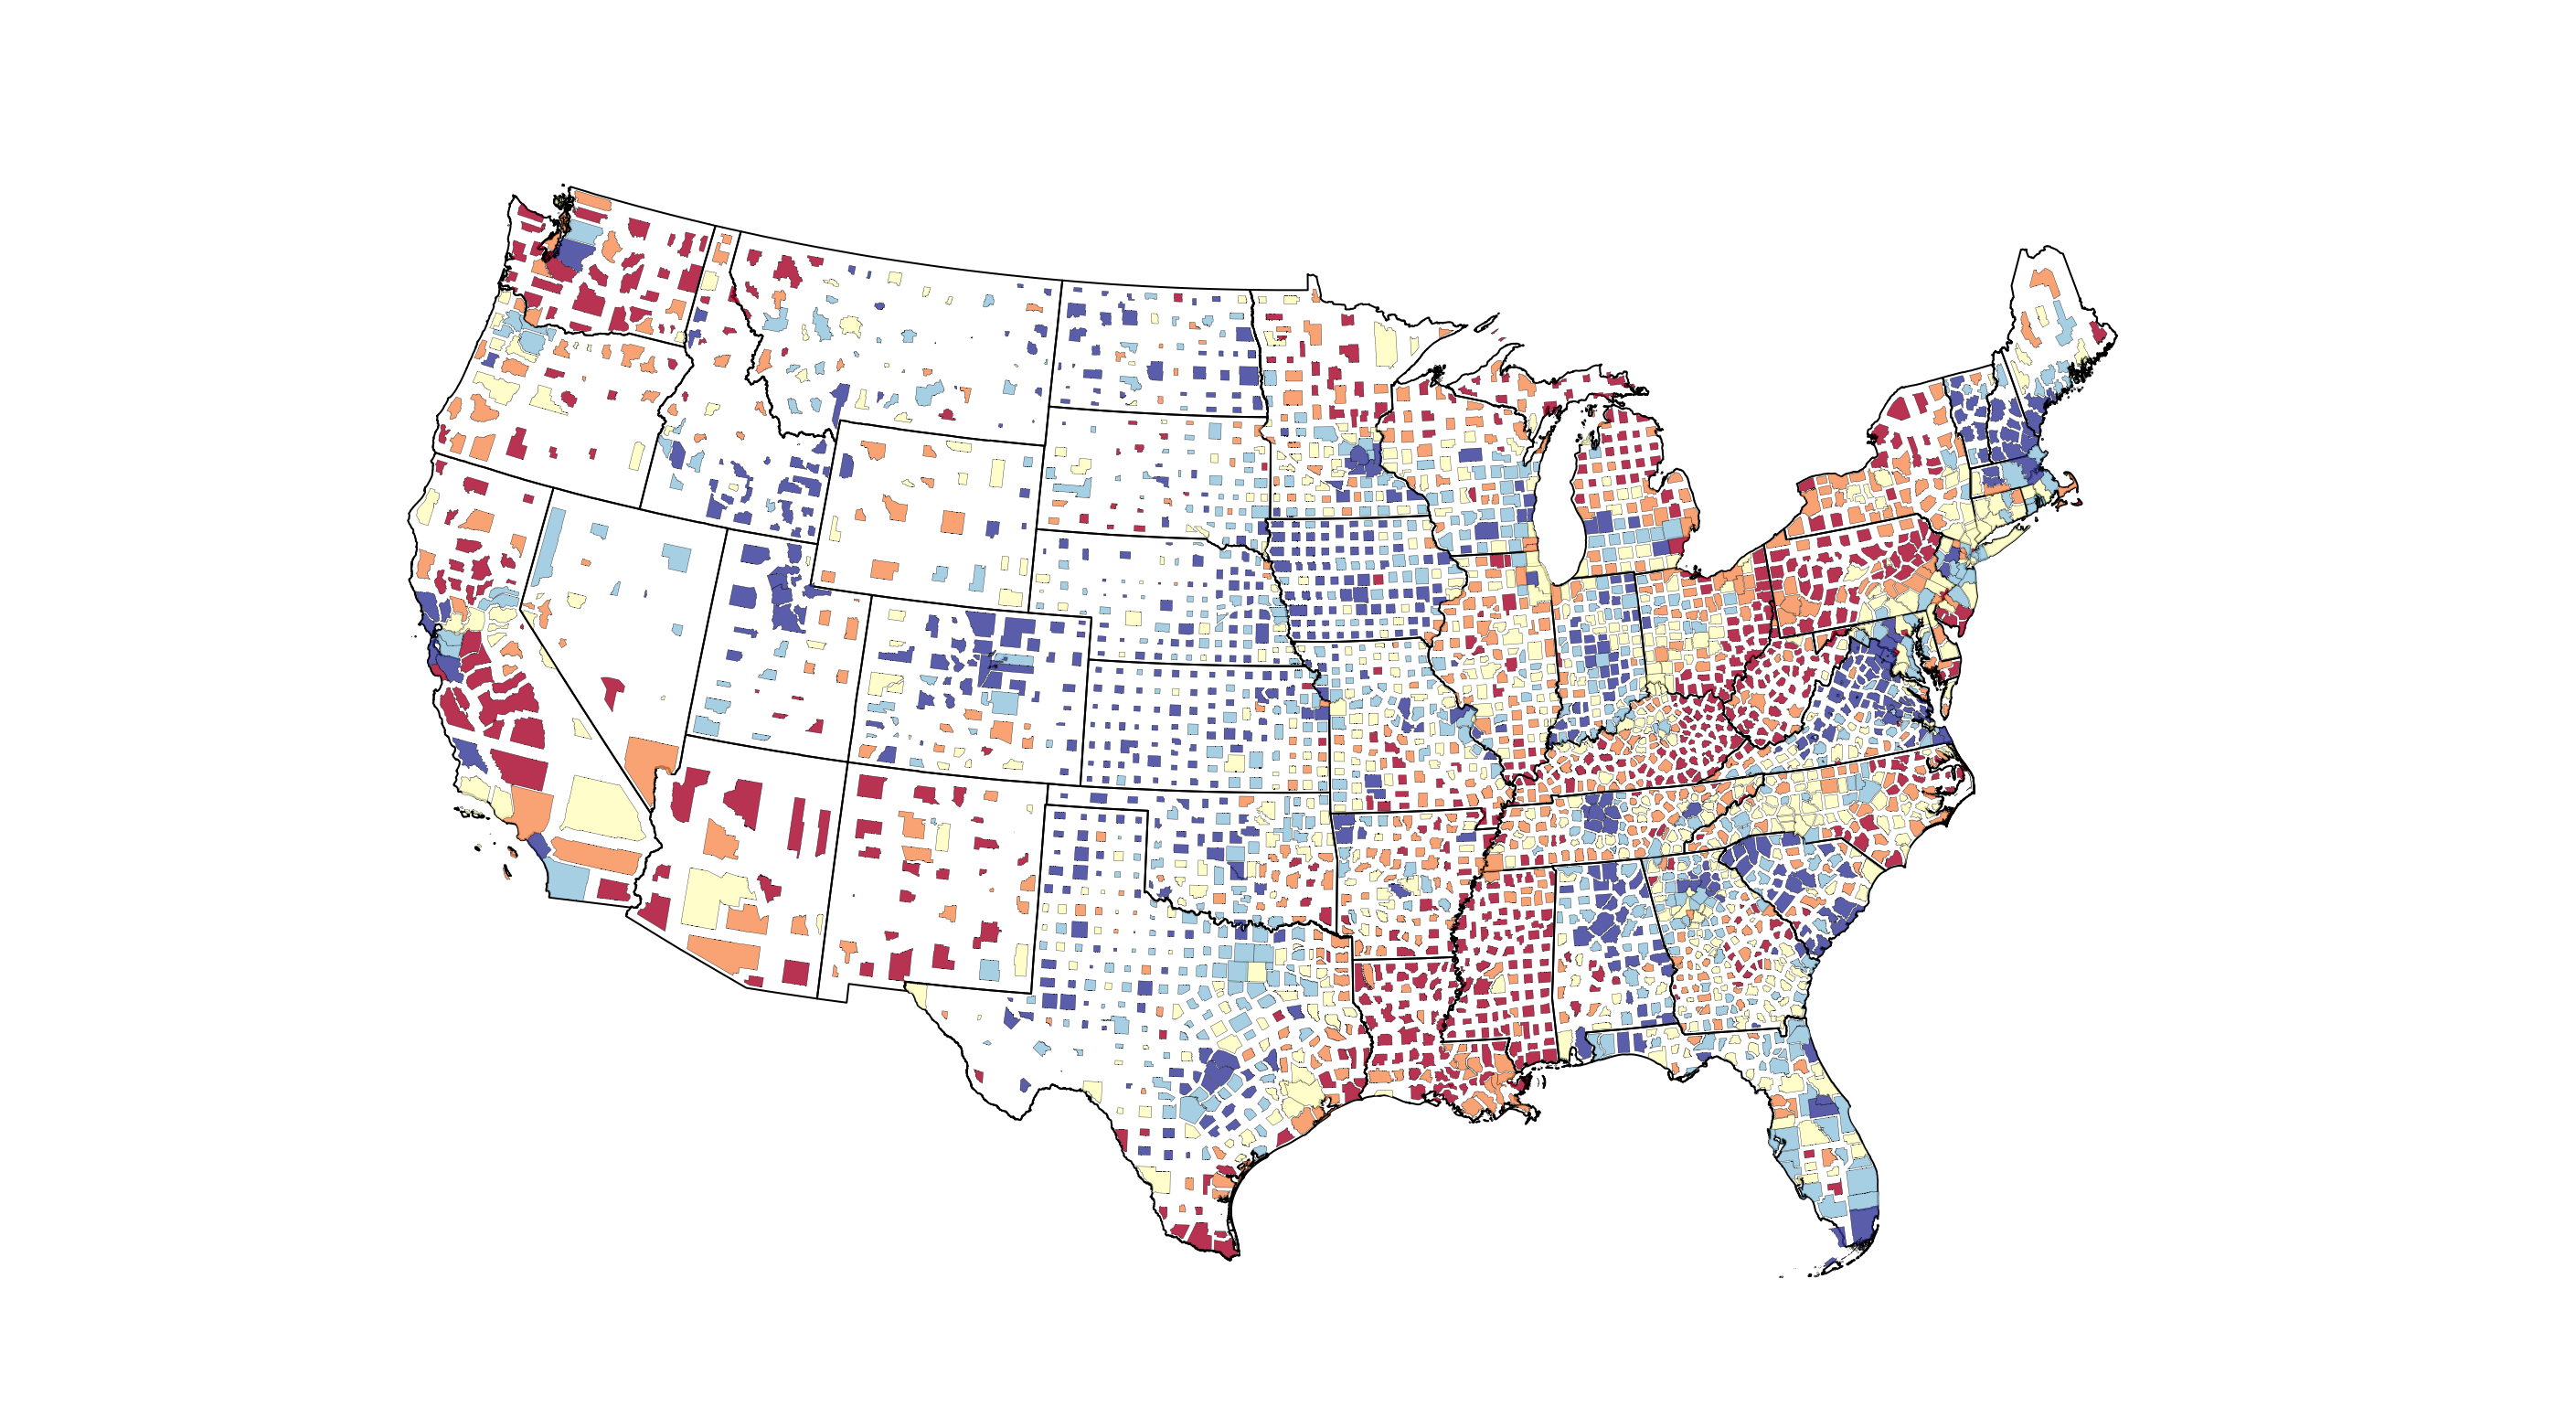

In [86]:
# Instead of doing manipulations of the density column on the dataframe,
# we can instead write a scaling function
def log_scale(minval, maxval):
    def scalar(val):
        max_scaling = mult_factor
        min_scaling = 0.0
        normed_log = np.log10(val) - np.log10(minval)
        max_log = np.log10(maxval) - np.log10(minval)
        factor = (max_scaling-min_scaling) * normed_log/max_log + min_scaling
        return factor
    return scalar

ax = geoplot.polyplot(
    df_states, 
    projection=gcrs.Orthographic(),
    edgecolor='black', 
    facecolor='none',
    linewidth = 1,
    figsize=(25, 25)
)

geoplot.cartogram(
    unemployment_choropleth,
    scale='Density',
    scale_func=log_scale,
    projection=gcrs.Orthographic(),
    scheme='quantiles',
    hue='Rate',
    cmap='RdYlBu_r',
    linewidth=0.2,
    edgecolor='black',
    alpha=0.8,    
    ax = ax)